# Lecture 7-1

## learning rate <br>

값이 엄청 크면 밖으로 팅겨 나갈 수 도 있다. (overshooting) <br>
값이 엄청 작으면 최저점이 아닌 곳에 stop이 된다.<br>

보통 0.01 부터 시작하여 알맞은 learning rate 값을 구한다

## Dat (X) preprocessing for gradient descent<br>

데이터 값의 변동이 클 때 보통 normalized 를 한다<br><br>
zero-coenterad data = data의 중심이 0으로 가게 맞춤<br>
normalized data = data 전체의 범위가 어느 한 곳에 항상 들어 가도록 맞춤

학습이 잘 안되고, cost가 발산을 하던지 이상한 동작이 되면<br>
> 데이터 값의 차이가 큰 것이 있는지, preprocessing 을 하였는지 점검

normalized 하는 법<br>
1. Standardization <br>
> X_std[ : , 0 ] = (X[ : , 0 ] - X[ : , 0 ].mean()) / X[ : , 0 ].std()

ML 의 가장 큰 문제 <br>
1. Overfitting <br>
> 학습데이터에 너무 잘 맞는 모델을 만듬 (학습 데이터로는 잘 되나 test 데이터는 어긋나는 현상)<br>

예방법 <br>
> More training data (많을 수록 줄일 수 있다.)<br>
> 가지고 있는 features의 갯수를 중복된 것이 있으면 줄인다. <br>
> Regularization (일반화)

### Regularization (일반화)

> 가지고 있는 weight을 너무 큰 값을 가지고 있지말자 <br>

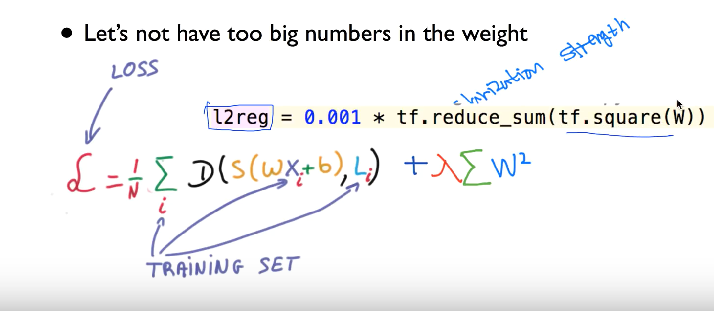

In [1]:
# 하는 법 
from PIL import Image
Image.open('regularization.PNG')

loss 의 값을 줄이기 위해 w를 작게 만듬 (lamda 값으로 조정)<br>
l2reg = 0.001 * tf.reduce_sum(tf.square(W)) <br>
상수값 <br>
0 = 일반화 필요없다. <br>
1 = 필요하다 <br>
0.001 = 하긴하는데 크게 중요하지는 않다 <br><br>
> 이것을 cost 와 더해서 최소화 시킨다

# Lecture 7-2

data 를 training 데이터와 testing 데이터로 나눈다.<br>
training data 로 학습을 한 ML 으로 testing data로 test를 하여 값을 비교<br>
or <br>
data 를 training data , Validation , testing data로 나눈다.<br>
Validation  = learning rate , lamda(regularization을 구하기위한 상수) <br>

### Online learning

> 엄청 큰 데이터의 양을 학습시키기 위해 데이터를 나눠서 중첩시켜서 학습시킴<br>
> 또는 신규데이터를 추가하여 갱신할 때도 쓰인다

----

In [1]:
# training and test datasets 을 나눔
import tensorflow as tf

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_data = [[1,2,1],[1,3,2],[1,3,4],[1,5,5],[1,7,5],[1,2,5],[1,6,6],[1,7,7]]
y_data = [[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]]

x_test = [[2,1,1],[3,1,2],[3,3,4]]
y_test = [[0,0,1],[0,0,1],[0,0,1]]

In [3]:
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.arg_max(hypothesis,1)
is_correct = tf.equal(prediction, tf.arg_max(Y,1)) # 그게 맞는지 아닌지 측정
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


Instructions for updating:
Use `tf.math.argmax` instead


In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X:x_data, Y:y_data})
        if step % 20 ==0 :                                           # training data로 학습
            print(step, cost_val,W_val)
    
    print("Prediction:",sess.run(prediction, feed_dict={X:x_test})) #test data로 측정
    print("Accuracy: ",sess.run(accuracy, feed_dict={X:x_test, Y:y_test}))

0 6.3287797 [[ 9.8609978e-01 -2.2300731e-02  2.0673661e+00]
 [ 3.3545777e-02  9.3511283e-01  3.8067254e-01]
 [ 1.2082756e-03  1.0486553e+00  7.1305954e-01]]
20 0.9122713 [[ 0.9113877  -0.17536907  2.2951465 ]
 [ 0.56571126  0.3965142   0.3871056 ]
 [ 0.6177229   0.7055713   0.43962884]]
40 0.8270574 [[ 0.7513846  -0.22193392  2.5017145 ]
 [ 0.56060916  0.36595255  0.42276943]
 [ 0.6849373   0.7630029   0.3149828 ]]
60 0.76924944 [[ 0.6126822  -0.25862738  2.6771111 ]
 [ 0.56225634  0.35667792  0.43039688]
 [ 0.7398526   0.7922026   0.23086777]]
80 0.7267121 [[ 0.489181   -0.28660464  2.82859   ]
 [ 0.5664922   0.35792086  0.4249182 ]
 [ 0.7857781   0.8071238   0.17002143]]
100 0.693586 [[ 0.37692294 -0.30748424  2.9617271 ]
 [ 0.57172567  0.36371803  0.41388744]
 [ 0.82584363  0.81441045  0.12266906]]
120 0.6667173 [[ 0.27327377 -0.322663    3.0805552 ]
 [ 0.5770887   0.37115625  0.4010862 ]
 [ 0.86206955  0.81753546  0.08331811]]
140 0.64424586 [[ 0.17642944 -0.33326486  3.1880014 ]
 

In [5]:
# Learning rate 
# overshooting
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.5).minimize(cost)

prediction = tf.arg_max(hypothesis,1)
is_correct = tf.equal(prediction, tf.arg_max(Y,1)) 
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X:x_data, Y:y_data})
        if step % 20 ==0 :                                           # training data로 학습
            print(step, cost_val,W_val)
    
    print("Prediction:",sess.run(prediction, feed_dict={X:x_test})) #test data로 측정
    print("Accuracy: ",sess.run(accuracy, feed_dict={X:x_test, Y:y_test}))

0 11.234741 [[-0.2707993  -0.29616845 -0.5846337 ]
 [ 0.02525115  2.547925   -4.228374  ]
 [ 3.926372    0.9618362  -4.8082747 ]]
20 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
40 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
60 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
80 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
100 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
120 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
140 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
160 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
180 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
200 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
Prediction: [0 0 0]
Accuracy:  0.0


In [7]:
# Small learning rate

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost)

prediction = tf.arg_max(hypothesis,1)
is_correct = tf.equal(prediction, tf.arg_max(Y,1)) 
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X:x_data, Y:y_data})
        if step % 20 ==0 :                                           # training data로 학습
            print(step, cost_val,W_val)
    
    print("Prediction:",sess.run(prediction, feed_dict={X:x_test})) #test data로 측정
    print("Accuracy: ",sess.run(accuracy, feed_dict={X:x_test, Y:y_test}))

0 3.4748158 [[-0.8104894   1.1126761  -0.43118286]
 [ 1.3789835   0.05005589 -1.0511018 ]
 [-0.9710017  -0.66848516  0.48760659]]
20 3.4748158 [[-0.8104894   1.1126761  -0.43118286]
 [ 1.3789835   0.05005589 -1.0511018 ]
 [-0.9710017  -0.66848516  0.48760659]]
40 3.4748158 [[-0.8104894   1.1126761  -0.43118286]
 [ 1.3789835   0.05005589 -1.0511018 ]
 [-0.9710017  -0.66848516  0.48760659]]
60 3.4748158 [[-0.8104894   1.1126761  -0.43118286]
 [ 1.3789835   0.05005589 -1.0511018 ]
 [-0.9710017  -0.66848516  0.48760659]]
80 3.4748158 [[-0.8104894   1.1126761  -0.43118286]
 [ 1.3789835   0.05005589 -1.0511018 ]
 [-0.9710017  -0.66848516  0.48760659]]
100 3.4748158 [[-0.8104894   1.1126761  -0.43118286]
 [ 1.3789835   0.05005589 -1.0511018 ]
 [-0.9710017  -0.66848516  0.48760659]]
120 3.4748158 [[-0.8104894   1.1126761  -0.43118286]
 [ 1.3789835   0.05005589 -1.0511018 ]
 [-0.9710017  -0.66848516  0.48760659]]
140 3.4748158 [[-0.8104894   1.1126761  -0.43118286]
 [ 1.3789835   0.05005589 -1.

In [10]:
import numpy as np

In [29]:
# Non-normalized inputs
# 데이터 값이 크거나 데이터의 값의 차이가 많이 심할 때에는 normalized 를 하는게 좋다
xy = np.array([[828.659973,833.450012,908100,828.349976,831.659973],
             [823.02002,828.070007,1828100,821.655029,828.070007],
             [819.929993,824.400024,1438100,818.97998,824.159973],
             [816,820.958984,1008100,815.48999,819.23999],
             [819.359985,823,1188100,818.469971,818.97998],
             [819,823,1198100,816,820.450012],
             [811.700012,815.25,1098100,809.780029,813.669983],
             [809.51001,816.659973,1398100,804.539978,809.559998]])

In [16]:
x_data = xy[:,0:-1]
y_data = xy[:,[-1]] 

X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

hypothesis = tf.matmul(X, W)+b
cost = tf.reduce_mean(tf.square(hypothesis-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


In [20]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        print(step, "Cost: ",cost_val, "\nPrediction:\n", hy_val)
# input data 가 nomalized 가 안되었기 때문

0 Cost:  5607212400000.0 
Prediction:
 [[-1670026.4]
 [-3361131.8]
 [-2644245. ]
 [-1853830.4]
 [-2184703.5]
 [-2203080.5]
 [-2019259.4]
 [-2570699.8]]
200 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
400 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
600 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
800 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1000 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1200 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1400 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1600 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1800 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
2000 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [na

In [27]:
# min-max scale  작은 값은 0으로 큰 값을 1로 변경
from sklearn.preprocessing import MinMaxScaler 



In [30]:
xy = MinMaxScaler().fit_transform(xy)

In [31]:
print(xy)

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [32]:
x_data = xy[:,0:-1]
y_data = xy[:,[-1]] 

X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

hypothesis = tf.matmul(X, W)+b
cost = tf.reduce_mean(tf.square(hypothesis-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [33]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        print(step, "Cost: ",cost_val, "\nPrediction:\n", hy_val)

0 Cost:  0.41810322 
Prediction:
 [[ 0.6801326 ]
 [ 0.42925358]
 [ 0.04742265]
 [-0.3583495 ]
 [-0.10229015]
 [-0.11236012]
 [-0.77595437]
 [-0.703392  ]]
200 Cost:  0.41330427 
Prediction:
 [[ 0.6854585 ]
 [ 0.43463212]
 [ 0.05198318]
 [-0.35471302]
 [-0.09808588]
 [-0.10827559]
 [-0.77296674]
 [-0.7003956 ]]
400 Cost:  0.40857714 
Prediction:
 [[ 0.6907413 ]
 [ 0.4399687 ]
 [ 0.05650848]
 [-0.3511039 ]
 [-0.09391391]
 [-0.10422248]
 [-0.77000046]
 [-0.6974202 ]]
600 Cost:  0.40391916 
Prediction:
 [[ 0.69598454]
 [ 0.44526583]
 [ 0.0610007 ]
 [-0.3475209 ]
 [-0.0897724 ]
 [-0.10019875]
 [-0.76705515]
 [-0.69446546]]
800 Cost:  0.39932925 
Prediction:
 [[ 0.7011861 ]
 [ 0.4505226 ]
 [ 0.06545943]
 [-0.34396362]
 [-0.08566153]
 [-0.09620452]
 [-0.76412916]
 [-0.69153   ]]
1000 Cost:  0.39481053 
Prediction:
 [[ 0.70634145]
 [ 0.4557349 ]
 [ 0.06988108]
 [-0.3404352 ]
 [-0.08158475]
 [-0.09224343]
 [-0.7612254 ]
 [-0.68861616]]
1200 Cost:  0.39035675 
Prediction:
 [[ 0.7114596 ]
 [ 0.46

In [14]:
Pl = 3.141592
r = float(input("반지름을 입력 : "))
if r > 0:
    print("원의 넓이는 :"+ str(r*r*Pl))
    print("원의 둘레는 :"+ str(2*r*Pl))
else :
    print("잘못된 입력입니다.")

반지름을 입력 :  -2


오류입니다.


In [ ]:
num = input("점수를 입력하시오: ")

if(num>=95):
    print("A+")
    